In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
import sympy

In [3]:
sympy.init_printing()

In [4]:
def linregress_slope(xs, ys):
    slope, _, _, _, _ = scipy.stats.linregress(xs, ys)
    return slope


def linregress_y_intercept(xs, ys):
    _, intercept, _, _, _ = scipy.stats.linregress(xs, ys)
    return intercept

# infant mortality

In [5]:
infant_data = {'Year': [1950, 1960, 1970, 1980, 1990, 2000],
        'Rate': [29.2, 26.0, 20.0, 12.6, 9.2, 6.9]}

In [6]:
infant_frame = DataFrame(infant_data)

In [7]:
infant_frame

,Year,Rate
0,1950,29.2
1,1960,26.0
2,1970,20.0
3,1980,12.6
4,1990,9.2
5,2000,6.9


In [8]:
infant_frame['Year'] - 1950

0     0
1    10
2    20
3    30
4    40
5    50
Name: Year, dtype: int64

In [9]:
m = linregress_slope(infant_frame['Year'] - 1950, infant_frame['Rate'])
b = linregress_y_intercept(infant_frame['Year'] - 1950, infant_frame['Rate'])
x, y = sympy.symbols('x, y')

In [10]:
sympy.Eq(y, m*x + b)

<IPython.core.display.Javascript object>


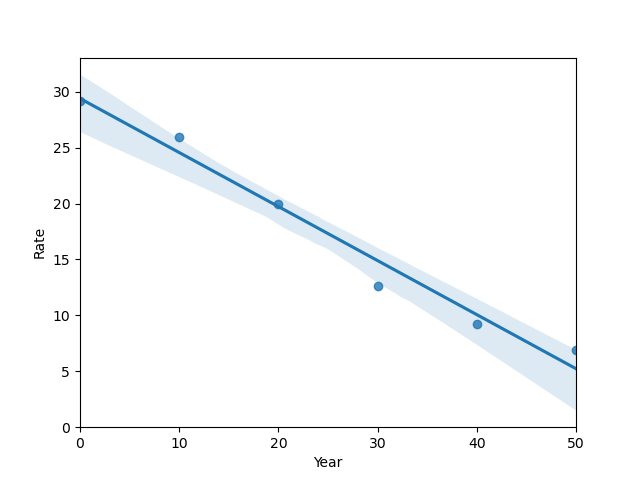

<AxesSubplot:xlabel='Year', ylabel='Rate'>

In [11]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
sns.regplot(x=infant_frame['Year'] - 1950, y=infant_frame['Rate'])

In [24]:
x = infant_frame['Year'] - 1950
y = infant_frame['Rate']
xy = (infant_frame['Year'] - 1950) * infant_frame['Rate']
number_of_points = len(infant_frame)

sigma_x = np.sum(x)
sigma_y = np.sum(y)
sigma_xy = np.sum(xy)
sigma_x_squared = np.sum(x ** 2)

In [32]:
m = (((number_of_points * sigma_xy) - 
      (sigma_x * sigma_y)) / 
     
     ((number_of_points * sigma_x_squared) - 
      (sigma_x ** 2)))

In [33]:
m

In [34]:
m == linregress_slope(infant_frame['Year'] - 1950, infant_frame['Rate'])

True

In [36]:
b = (sigma_y - (m * sigma_x)) / number_of_points

In [40]:
abs(b - 
    linregress_y_intercept(infant_frame['Year'] - 
                           1950, infant_frame['Rate'])) < 0.000000001

True